## upload all the necessary files.
1.  **numpy :** it is used for numerical operations in Python.
2. **pandas** : for data manipulation and analysis.
3. **sklearn.decomposition  PCA**: Import the PCA class from scikit-learn for performing Principal Component Analysis.
4. **matplotlib**: Import the matplotlib library for creating plots and visualizations.
5. **seaborn**: Import the seaborn library for improved data visualization.
6. **train_test_split**:  to split the dataset into training and testing sets.
7. **DecisionTreeClassifier**: for building a decision tree model.
8. **classification_report, accuracy_score, confusion_matrix**: Import metrics for evaluating the classifier's performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# **upload the iris dataset**
** Load the Iris dataset into the digits variable.**

In [ ]:
from sklearn.datasets import load_iris
digits = load_iris()

**Create a DataFrame named data1 containing the features of the Iris dataset.**

In [ ]:
data1=pd.DataFrame(digits.data)

**1. Assign the features to the x variable.**
**2. Assign the target labels to the y variable.**

In [ ]:
x=digits.data
y=digits.target

**size of the IRIS dataset**

In [ ]:

x.shape

(150, 4)

In [ ]:
y.shape

(150,)

**Standardize the features using 'StandardScaler'.**


In [ ]:
from sklearn.preprocessing import StandardScaler

# Data Normalization
X_std = StandardScaler().fit_transform(x)

**The mean vector and covariance matrix for the standardized features.**
**eigenvalues and eigenvectors from the covariance matrix.**

In [ ]:
mean_vec = np.mean(X_std, axis=0)
print(mean_vec)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [ ]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

**Create a list of eigenvalue-eigenvector pairs and sort them in descending order of eigenvalues.**

In [ ]:

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

**Calculate individual explained variance and cumulative explained variance from eigenvalues.**

In [ ]:
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

**Create a bar plot of individual and cumulative explained variance.**

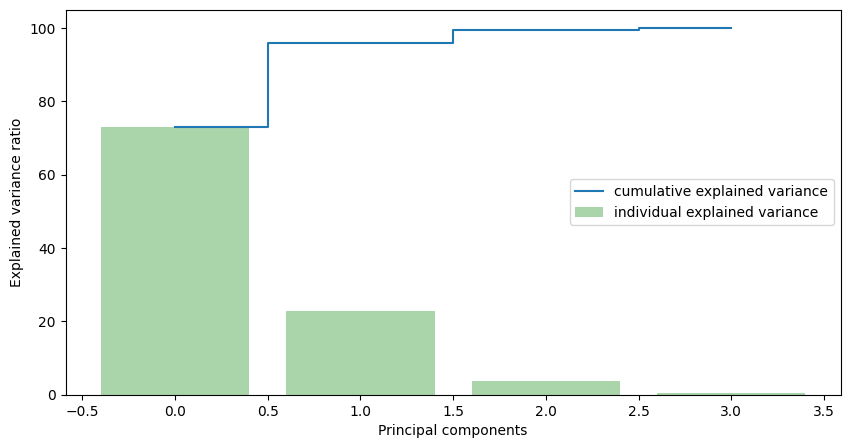

In [ ]:

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

**Split the data into training and testing sets using** **train_test_split**.

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(X_std,y)

**Create a PCA object with n_components set to 3 and transform the training and testing data using PCA.**

In [ ]:
#Initiate PCA
pca = PCA(n_components=3)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

**Create a Decision Tree classifier (rf) and fit it to the PCA-transformed training data.**

In [ ]:
rf=DecisionTreeClassifier().fit(pca_x_train,y_train)

**Predict the labels using the classifier on the PCA-transformed testing data.**

In [ ]:
predicted=rf.predict(pca_x_test)

**The accuracy score of the predicted labels.**

In [ ]:
accuracy_score(predicted,y_test)

0.9736842105263158

**Set the expected variable to the true labels of the testing data.**

In [ ]:
expected=y_test

**Create a figure for plotting with specified dimensions and adjustments**
**Create a scatter plot to visualize the predicted and actual classes using PCA components**


<Figure size 600x600 with 0 Axes>

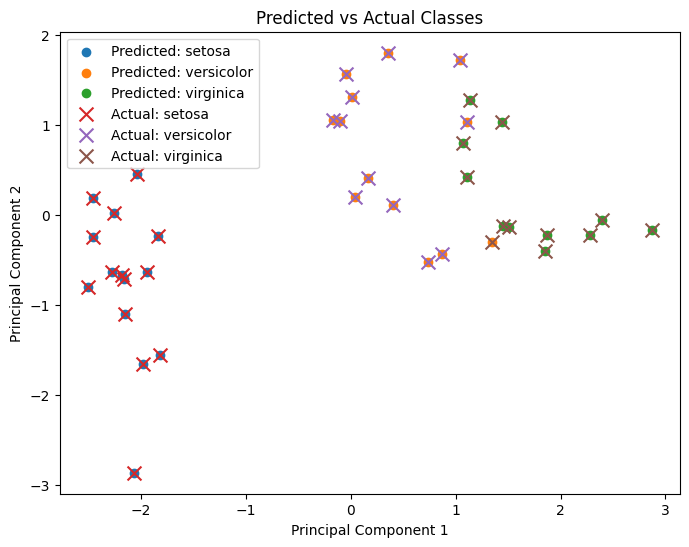

In [ ]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the prediction
plt.figure(figsize=(8, 6))

# Plot points colored by predicted class
for target, target_name in enumerate(digits.target_names):
    plt.scatter(pca_x_test[predicted == target, 0], pca_x_test[predicted == target, 1],
                label=f'Predicted: {target_name}')

# Plot actual classes as markers
for target, target_name in enumerate(digits.target_names):
    plt.scatter(pca_x_test[expected == target, 0], pca_x_test[expected == target, 1],
                marker='x', s=100, label=f'Actual: {target_name}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Predicted vs Actual Classes')
plt.legend()
plt.show()
